# Золотарев Антон, ИАД-1
# Домашнее задание 2. Классификация, детекция.

Оценка за часть 1 и часть 2 в этом дз -- по 5 баллов.

## Часть 1. Классификация

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в датасете есть. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train и val, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат собственно сами изображения.
 
__Задание__. Добейтесь accuracy **не менее 0.44**. Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи/блогпосты/вопросы на stackoverflow/видосы от (индийских) ютуберов/курсы/подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете. 

В коде ниже необходимо, чтобы код проходил все `assert`'ы.

Необходимо написать функцию `predict` по шаблону ниже. Эта функция принимает на вход модель, даталоадер с валидационнами данными, criterion для подсчёта лосса и device, на котором будут производиться вычисления (определён ниже) и возвращает список лоссов по всем объектам, список из предсказанных классов для каждого объекта из из даталоалера и список из настоящих классов для каждого объекта в даталоадере (и именно в таком порядке).

__Использовать внешние данные для обучения строго запрещено__. Можно использовать предобученные модели из `torchvision`.

__Критерии оценки__: Оценка вычисляется по простой формуле: min(5, 5 * Ваша accuracy / 0.44). Оценка округляется до десятых по арифметическим правилам.

__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать на защите :)
 - Используйте аугментации. Для этого пользуйтесь модулем torchvision.transforms или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - (ещё раз) Можно файнтюнить предобученные модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом ImageFolder), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы отладить код, пробуйте обучаться на маленькой части датасета. Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать гпу. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.
 
Good luck & have fun! :)

In [1]:
import glob
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/HW_2_IAD20"

Mounted at /content/drive
archive.zip  dataset.zip  Zolotarev_hw2.ipynb


In [2]:
!unzip -q /content/drive/MyDrive/HW_2_IAD20/dataset.zip

In [3]:
!ls

dataset  drive	sample_data


In [4]:
import torch
import torchvision
from torch import nn
from torch.nn import functional as F
import numpy as np
from torchvision.datasets import ImageFolder
from torchvision.transforms import Compose, Resize, ToTensor, Normalize
from torch.utils.data import DataLoader
# You may add any imports you need

#Не хочу писать класс, буду использовать ImageFolder
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, data_dir, transform):
        #
        pass
    def __getitem__(self, idx):
        pass
    def __len__(self, idx):
        pass

In [ ]:
train_transform = Compose([ToTensor(), Normalize((0.5, 0.5, 0.5), (1, 1, 1)),])
val_transform = Compose([ToTensor(), Normalize((0.5, 0.5, 0.5), (1, 1, 1)),])
# YOU CAN DEFINE AUGMENTATIONS HERE

train_dataset = ImageFolder("./dataset/dataset/train", transform=train_transform)
val_dataset = ImageFolder("./dataset/dataset/val", transform=val_transform)

In [ ]:
# Just very simple checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


In [23]:
from tqdm import tqdm
import sys
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


def train_one_epoch(model, train_dataloader, criterion, optimizer, device="cuda:0"):
    losses, accuracies = [], []
    model.to(device).train()
    with tqdm(total=len(train_dataloader), file=sys.stdout) as prbar:
        for images, labels in train_dataloader:
            # Move Batch to GPU
            images = images.to(device)
            labels = labels.to(device)
            predicted = model(images)
            loss = criterion(predicted, labels)
            # Update weights
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            # Update descirption for tqdm
            _, pred = torch.max(predicted.detach(), 1)
            accuracy = accuracy_score(pred.cpu(), labels.cpu())
            losses.append(loss.item())
            accuracies.append(accuracy)
            prbar.set_description(
                f"Loss: {round(loss.item(), 4)} "
                f"Accuracy: {round(accuracy.item() * 100, 4)}%"
            )
            prbar.update(1)

    return losses, accuracies

def predict(model, val_dataloder, criterion, device="cuda:0"):
    model.to(device).eval()
    losses, predicted_classes, true_classes = [], [], []
    with tqdm(total=len(val_dataloader), file=sys.stdout) as prbar:
      with torch.no_grad():
        for images, labels in val_dataloader:
            # Move Batch to GPU
            images = images.to(device)
            labels = labels.to(device)
            predicted = model(images)
            loss = criterion(predicted, labels)

            losses.append(loss.item())
            _ , pred = torch.max(predicted, 1)
            predicted_classes.append(pred)
            true_classes.append(labels)
            accuracy = accuracy_score(pred.cpu(), labels.cpu())
            prbar.set_description(
                f"Loss: {round(loss.item(), 4)} "
                f"Accuracy: {round(accuracy.item() * 100, 4)}%"
            )
            prbar.update(1)
    # predict val_dataloader and print and return the validation accuracy
    # pass
    predicted_classes = torch.cat(predicted_classes).detach().cpu().numpy()
    true_classes = torch.cat(true_classes).detach().cpu().numpy()
    return losses, predicted_classes, true_classes


def train(model, train_dataloader, val_dataloader, criterion, optimizer, device="cuda:0", n_epochs=10, scheduler=None):
    model.to(device)
    train_accuracy_over_time = []
    for epoch in range(n_epochs):
        print("Epoch №:", epoch+1)
        train_losses, train_accuracies = train_one_epoch(model, train_dataloader, criterion, optimizer)
        
        #Добавим визуализацию для наглядности обучения
        train_accuracy_over_time.append(train_accuracies)
        x = np.arange(len(train_accuracies)*(epoch+1))
        fig, ax = plt.subplots(figsize=(10,4))
        ax.plot(x, np.array(train_accuracy_over_time).reshape(-1))
        ax.set_title('Изменение Accuracy по итерациям на обучающей выборке')
        plt.show()

        print("Result of validation:")
        losses, predicted_classes, true_classes = predict(model, val_dataloader, criterion)

        # Train, evaluate, print accuracy, make a step of scheduler or whatever you want...
        pass

In [ ]:
from torchvision.models import googlenet

# Загрузить предобученную сеть -- pretrained=True
model = googlenet(pretrained=True)

Изучим структуру используемой сети: она сложная.

In [ ]:
model

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [ ]:
model.fc = nn.Linear(1024, 200)

In [ ]:
model = model #GoogLeNet
optimizer = torch.optim.Adam(model.fc.parameters(), lr = 0.00001)
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4)
val_dataloader = DataLoader(val_dataset, batch_size=128, num_workers=4)
criterion = nn.CrossEntropyLoss()
scheduler = None
n_epochs = 50
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

Простой тест на проверку правильности написанного кода

In [ ]:
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(predicted_labels, true_labels)
print("tests passed")

Loss: 5.5254 Accuracy: 0.0%: 100%|██████████| 157/157 [00:06<00:00, 22.73it/s]
tests passed


Запустить обучение можно в ячейке ниже.

Epoch №: 1
Loss: 5.2694 Accuracy: 0.0%: 100%|██████████| 782/782 [01:09<00:00, 11.31it/s]


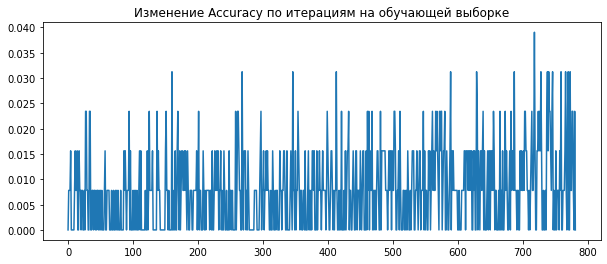

Result of validation:
Loss: 5.3891 Accuracy: 0.0%: 100%|██████████| 79/79 [00:05<00:00, 14.42it/s]
Epoch №: 2
Loss: 5.0652 Accuracy: 3.125%: 100%|██████████| 782/782 [01:11<00:00, 10.90it/s]


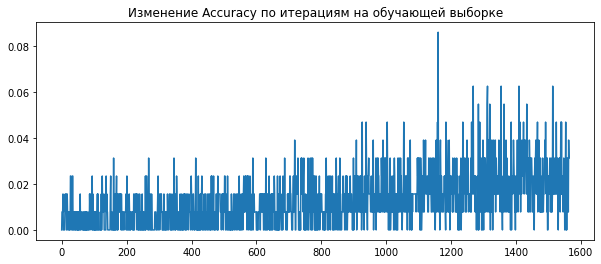

Result of validation:
Loss: 5.3332 Accuracy: 0.0%: 100%|██████████| 79/79 [00:05<00:00, 14.24it/s]
Epoch №: 3
Loss: 4.9852 Accuracy: 3.125%: 100%|██████████| 782/782 [01:10<00:00, 11.12it/s]


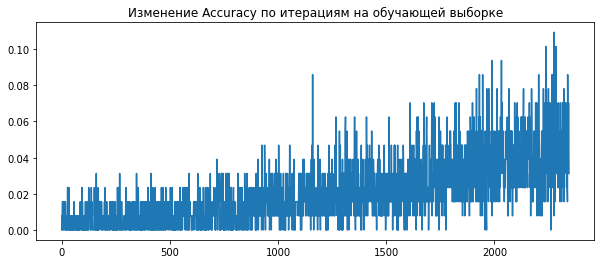

Result of validation:
Loss: 5.2379 Accuracy: 6.25%: 100%|██████████| 79/79 [00:05<00:00, 14.44it/s]
Epoch №: 4
Loss: 5.0461 Accuracy: 6.25%: 100%|██████████| 782/782 [01:09<00:00, 11.18it/s]


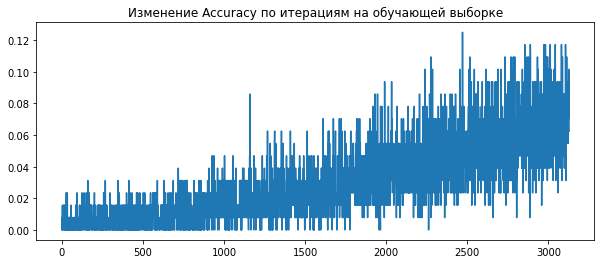

Result of validation:
Loss: 5.1147 Accuracy: 6.25%: 100%|██████████| 79/79 [00:05<00:00, 14.53it/s]
Epoch №: 5
Loss: 4.9731 Accuracy: 3.125%: 100%|██████████| 782/782 [01:09<00:00, 11.26it/s]


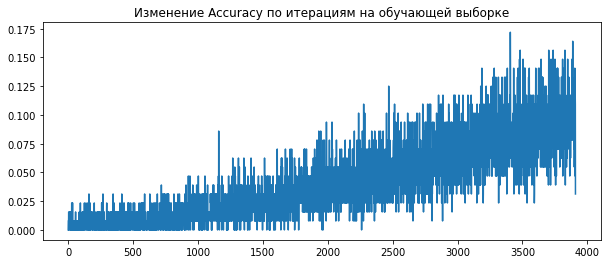

Result of validation:
Loss: 5.0049 Accuracy: 6.25%: 100%|██████████| 79/79 [00:05<00:00, 14.18it/s]
Epoch №: 6
Loss: 4.7929 Accuracy: 9.375%: 100%|██████████| 782/782 [01:08<00:00, 11.38it/s]


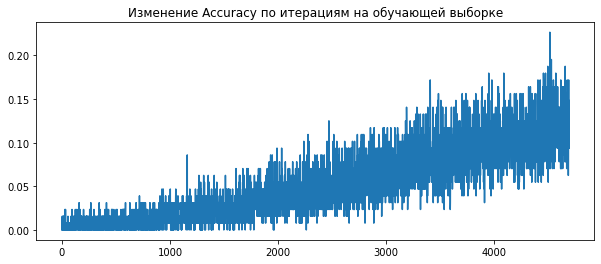

Result of validation:
Loss: 4.8938 Accuracy: 6.25%: 100%|██████████| 79/79 [00:05<00:00, 14.20it/s]
Epoch №: 7
Loss: 4.6999 Accuracy: 28.125%: 100%|██████████| 782/782 [01:08<00:00, 11.42it/s]


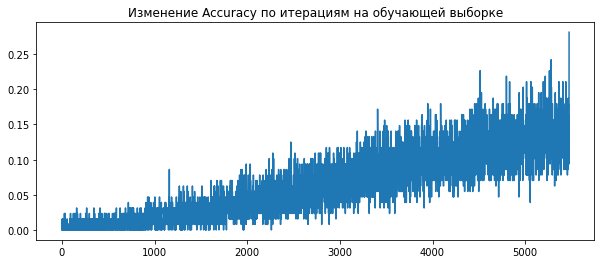

Result of validation:
Loss: 4.8337 Accuracy: 6.25%: 100%|██████████| 79/79 [00:05<00:00, 14.69it/s]
Epoch №: 8
Loss: 4.8504 Accuracy: 6.25%: 100%|██████████| 782/782 [01:08<00:00, 11.48it/s]


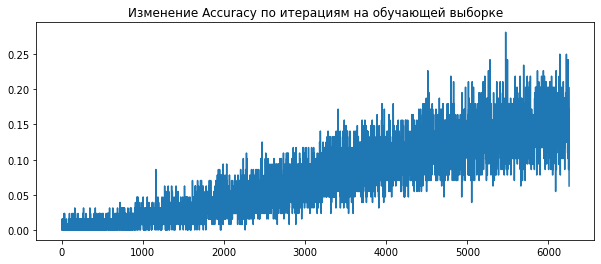

Result of validation:
Loss: 4.7689 Accuracy: 6.25%: 100%|██████████| 79/79 [00:05<00:00, 14.65it/s]
Epoch №: 9
Loss: 4.8752 Accuracy: 9.375%: 100%|██████████| 782/782 [01:07<00:00, 11.57it/s]


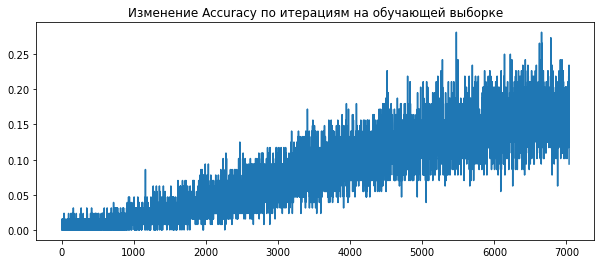

Result of validation:
Loss: 4.6001 Accuracy: 12.5%: 100%|██████████| 79/79 [00:05<00:00, 14.59it/s]
Epoch №: 10
Loss: 4.5911 Accuracy: 15.625%: 100%|██████████| 782/782 [01:07<00:00, 11.53it/s]


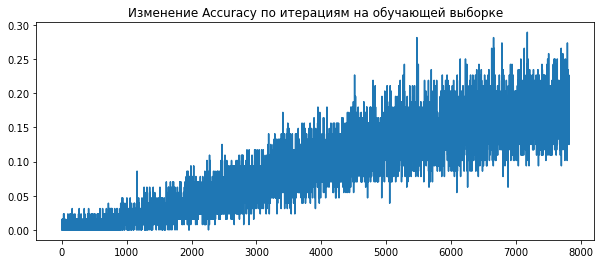

Result of validation:
Loss: 4.5202 Accuracy: 12.5%: 100%|██████████| 79/79 [00:05<00:00, 14.41it/s]
Epoch №: 11
Loss: 4.6611 Accuracy: 9.375%: 100%|██████████| 782/782 [01:08<00:00, 11.42it/s]


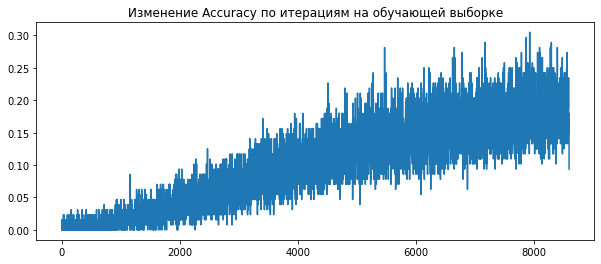

Result of validation:
Loss: 4.4608 Accuracy: 25.0%: 100%|██████████| 79/79 [00:05<00:00, 14.44it/s]
Epoch №: 12
Loss: 4.3009 Accuracy: 28.125%: 100%|██████████| 782/782 [01:07<00:00, 11.53it/s]


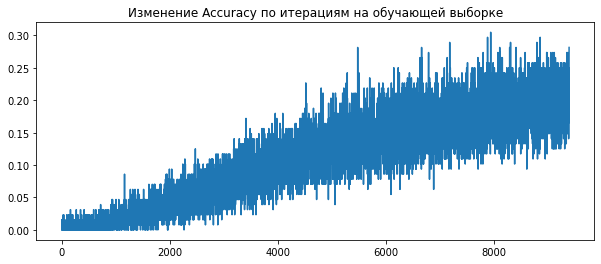

Result of validation:
Loss: 4.4153 Accuracy: 25.0%: 100%|██████████| 79/79 [00:05<00:00, 14.86it/s]
Epoch №: 13
Loss: 4.5824 Accuracy: 12.5%: 100%|██████████| 782/782 [01:07<00:00, 11.58it/s]


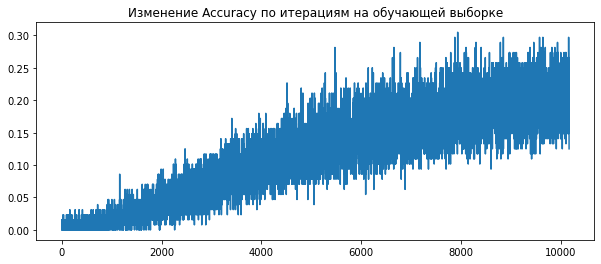

Result of validation:
Loss: 4.3652 Accuracy: 18.75%: 100%|██████████| 79/79 [00:05<00:00, 14.87it/s]
Epoch №: 14
Loss: 4.476 Accuracy: 12.5%: 100%|██████████| 782/782 [01:07<00:00, 11.57it/s]


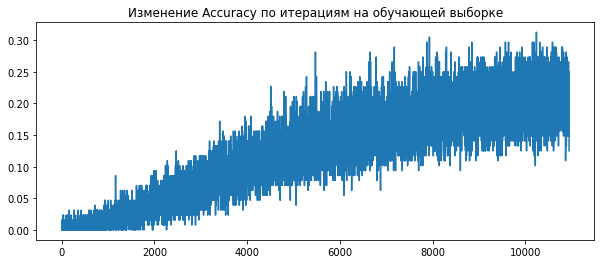

Result of validation:
Loss: 4.1863 Accuracy: 25.0%: 100%|██████████| 79/79 [00:05<00:00, 14.90it/s]
Epoch №: 15
Loss: 4.2696 Accuracy: 25.0%: 100%|██████████| 782/782 [01:07<00:00, 11.59it/s]


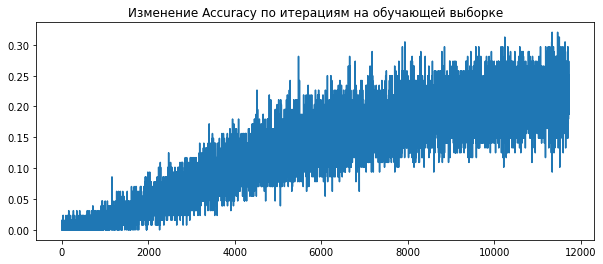

Result of validation:
Loss: 4.2734 Accuracy: 31.25%: 100%|██████████| 79/79 [00:05<00:00, 13.89it/s]
Epoch №: 16
Loss: 4.2034 Accuracy: 18.75%: 100%|██████████| 782/782 [01:06<00:00, 11.76it/s]


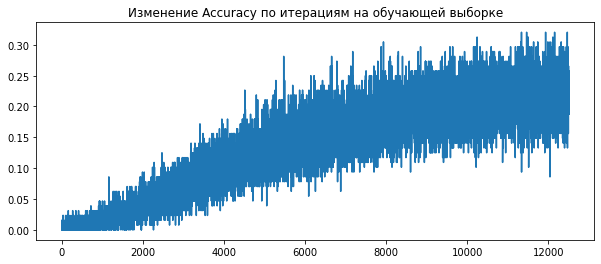

Result of validation:
Loss: 4.1109 Accuracy: 37.5%: 100%|██████████| 79/79 [00:05<00:00, 14.82it/s]
Epoch №: 17
Loss: 4.0347 Accuracy: 28.125%: 100%|██████████| 782/782 [01:06<00:00, 11.68it/s]


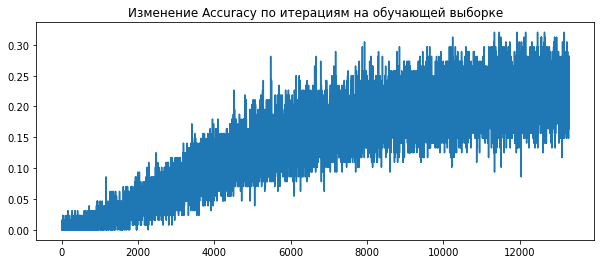

Result of validation:
Loss: 4.0666 Accuracy: 43.75%: 100%|██████████| 79/79 [00:05<00:00, 14.86it/s]
Epoch №: 18
Loss: 3.9243 Accuracy: 21.875%: 100%|██████████| 782/782 [01:06<00:00, 11.76it/s]


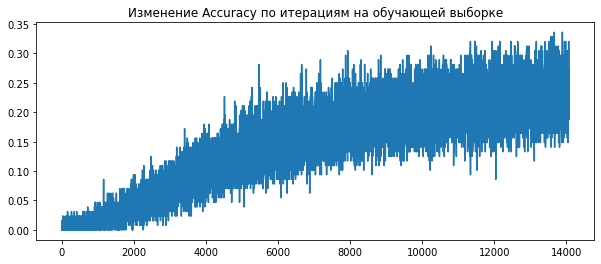

Result of validation:
Loss: 4.0181 Accuracy: 37.5%: 100%|██████████| 79/79 [00:05<00:00, 15.05it/s]
Epoch №: 19
Loss: 4.0685 Accuracy: 28.125%: 100%|██████████| 782/782 [01:06<00:00, 11.73it/s]


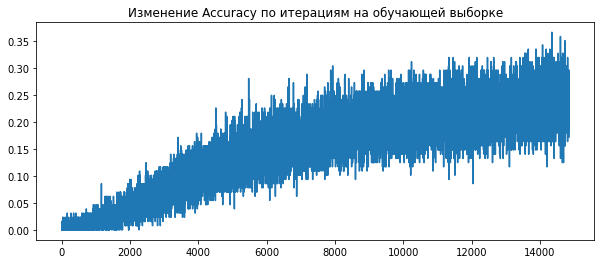

Result of validation:
Loss: 3.9963 Accuracy: 37.5%: 100%|██████████| 79/79 [00:05<00:00, 15.06it/s]
Epoch №: 20
Loss: 4.3659 Accuracy: 12.5%: 100%|██████████| 782/782 [01:06<00:00, 11.80it/s]


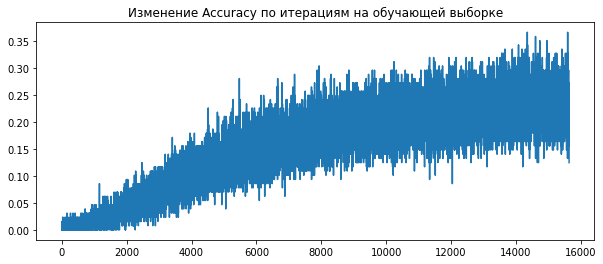

Result of validation:
Loss: 3.8848 Accuracy: 43.75%: 100%|██████████| 79/79 [00:05<00:00, 15.11it/s]
Epoch №: 21
Loss: 4.4389 Accuracy: 12.5%: 100%|██████████| 782/782 [01:06<00:00, 11.80it/s]


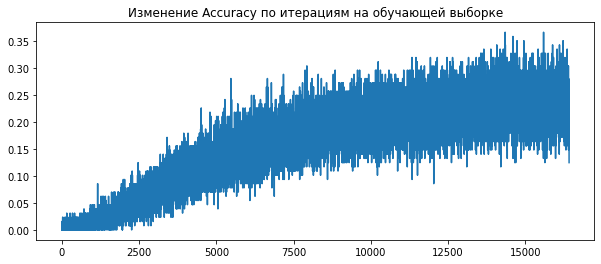

Result of validation:
Loss: 3.8179 Accuracy: 43.75%: 100%|██████████| 79/79 [00:05<00:00, 15.23it/s]
Epoch №: 22
Loss: 4.1164 Accuracy: 31.25%: 100%|██████████| 782/782 [01:06<00:00, 11.78it/s]


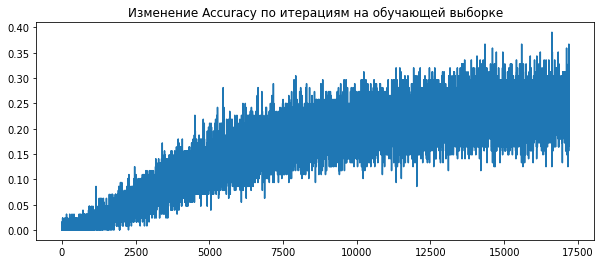

Result of validation:
Loss: 3.9032 Accuracy: 31.25%: 100%|██████████| 79/79 [00:05<00:00, 15.33it/s]
Epoch №: 23
Loss: 3.8745 Accuracy: 21.875%: 100%|██████████| 782/782 [01:06<00:00, 11.78it/s]


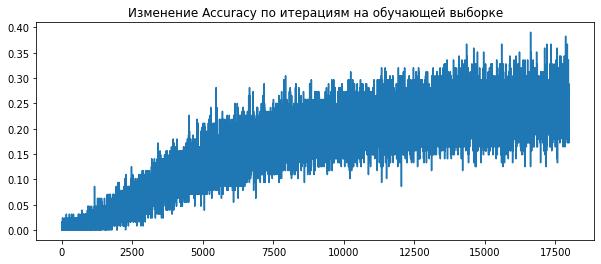

Result of validation:
Loss: 3.8161 Accuracy: 37.5%: 100%|██████████| 79/79 [00:05<00:00, 14.96it/s]
Epoch №: 24
Loss: 3.9339 Accuracy: 18.75%: 100%|██████████| 782/782 [01:06<00:00, 11.74it/s]


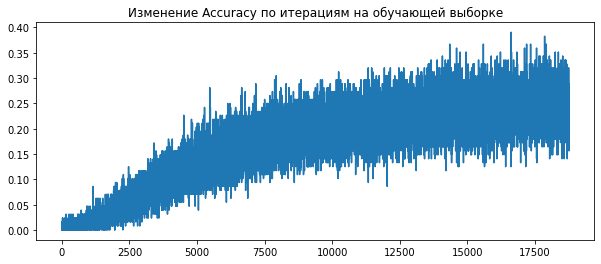

Result of validation:
Loss: 3.7536 Accuracy: 37.5%: 100%|██████████| 79/79 [00:05<00:00, 15.11it/s]
Epoch №: 25
Loss: 4.1031 Accuracy: 15.625%: 100%|██████████| 782/782 [01:06<00:00, 11.74it/s]


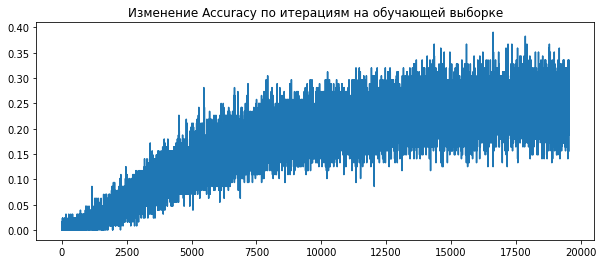

Result of validation:
Loss: 3.8064 Accuracy: 43.75%: 100%|██████████| 79/79 [00:05<00:00, 15.02it/s]
Epoch №: 26
Loss: 4.0955 Accuracy: 18.75%: 100%|██████████| 782/782 [01:06<00:00, 11.74it/s]


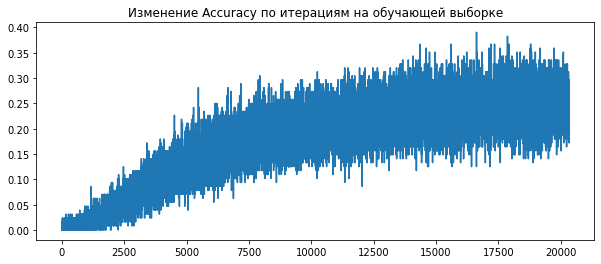

Result of validation:
Loss: 3.7324 Accuracy: 43.75%: 100%|██████████| 79/79 [00:05<00:00, 14.91it/s]
Epoch №: 27
Loss: 3.9576 Accuracy: 18.75%: 100%|██████████| 782/782 [01:06<00:00, 11.76it/s]


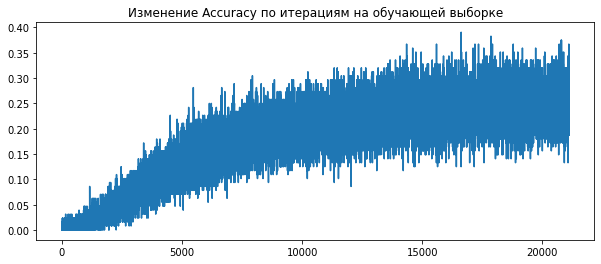

Result of validation:
Loss: 3.7369 Accuracy: 31.25%: 100%|██████████| 79/79 [00:05<00:00, 14.89it/s]
Epoch №: 28
Loss: 3.8848 Accuracy: 18.75%: 100%|██████████| 782/782 [01:06<00:00, 11.81it/s]


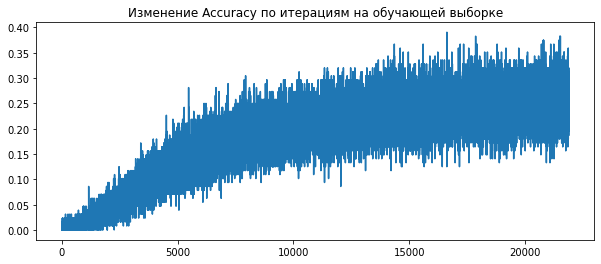

Result of validation:
Loss: 3.7145 Accuracy: 37.5%: 100%|██████████| 79/79 [00:05<00:00, 15.25it/s]
Epoch №: 29
Loss: 4.14 Accuracy: 18.75%: 100%|██████████| 782/782 [01:06<00:00, 11.77it/s]


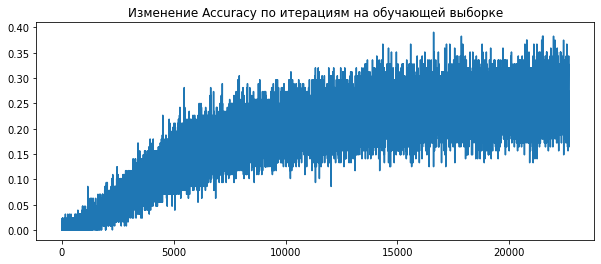

Result of validation:
Loss: 3.6656 Accuracy: 43.75%: 100%|██████████| 79/79 [00:05<00:00, 15.11it/s]
Epoch №: 30
Loss: 4.0624 Accuracy: 15.625%: 100%|██████████| 782/782 [01:06<00:00, 11.79it/s]


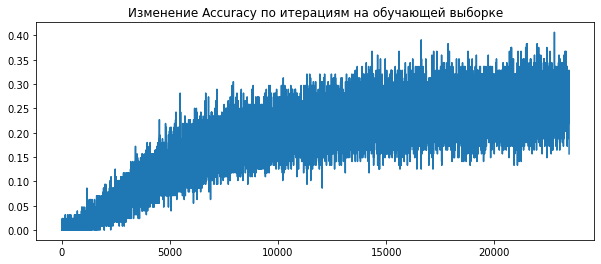

Result of validation:
Loss: 3.6038 Accuracy: 43.75%: 100%|██████████| 79/79 [00:05<00:00, 15.12it/s]
Epoch №: 31
Loss: 3.7624 Accuracy: 31.25%: 100%|██████████| 782/782 [01:06<00:00, 11.67it/s]


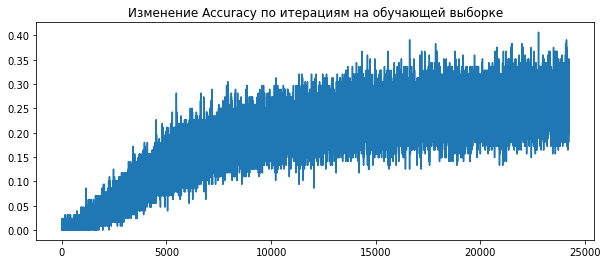

Result of validation:
Loss: 3.5545 Accuracy: 43.75%: 100%|██████████| 79/79 [00:05<00:00, 13.98it/s]
Epoch №: 32
Loss: 3.5636 Accuracy: 34.375%: 100%|██████████| 782/782 [01:06<00:00, 11.72it/s]


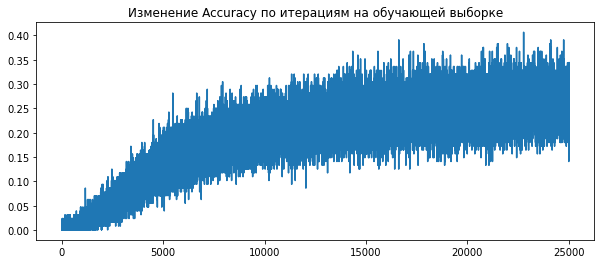

Result of validation:
Loss: 3.5982 Accuracy: 43.75%: 100%|██████████| 79/79 [00:05<00:00, 14.84it/s]
Epoch №: 33
Loss: 3.8445 Accuracy: 28.125%: 100%|██████████| 782/782 [01:07<00:00, 11.58it/s]


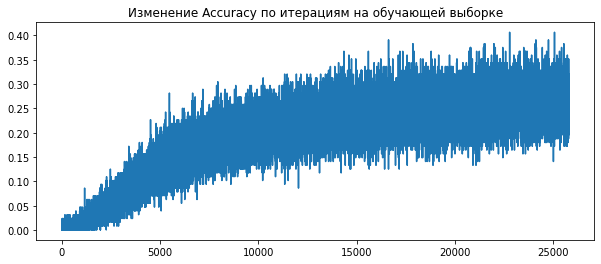

Result of validation:
Loss: 3.5741 Accuracy: 43.75%: 100%|██████████| 79/79 [00:05<00:00, 15.07it/s]
Epoch №: 34
Loss: 3.9151 Accuracy: 15.625%: 100%|██████████| 782/782 [01:07<00:00, 11.63it/s]


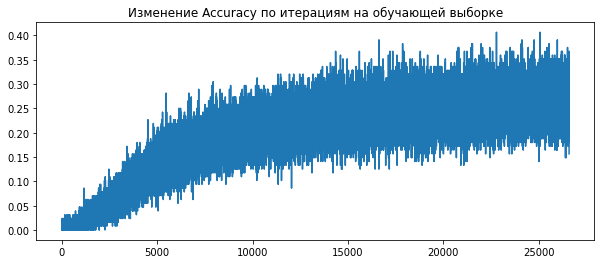

Result of validation:
Loss: 3.5918 Accuracy: 43.75%: 100%|██████████| 79/79 [00:05<00:00, 14.89it/s]
Epoch №: 35
Loss: 3.5984 Accuracy: 31.25%: 100%|██████████| 782/782 [01:07<00:00, 11.51it/s]


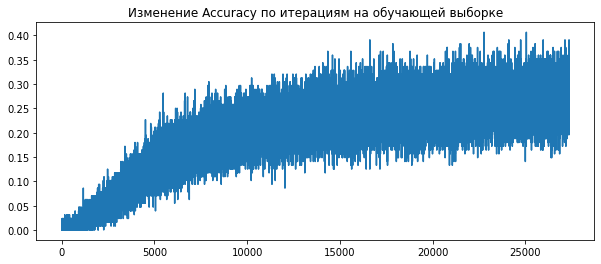

Result of validation:
Loss: 3.6526 Accuracy: 37.5%: 100%|██████████| 79/79 [00:05<00:00, 15.00it/s]
Epoch №: 36
Loss: 4.0913 Accuracy: 15.625%: 100%|██████████| 782/782 [01:07<00:00, 11.54it/s]


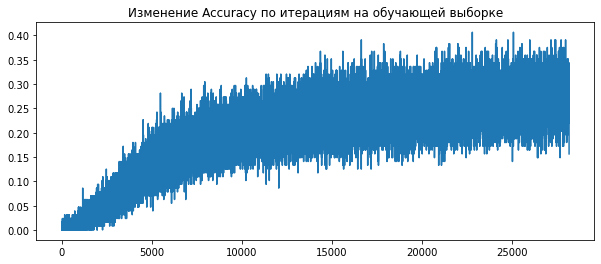

Result of validation:
Loss: 3.5682 Accuracy: 31.25%: 100%|██████████| 79/79 [00:05<00:00, 14.47it/s]
Epoch №: 37
Loss: 3.3469 Accuracy: 40.625%: 100%|██████████| 782/782 [01:08<00:00, 11.49it/s]


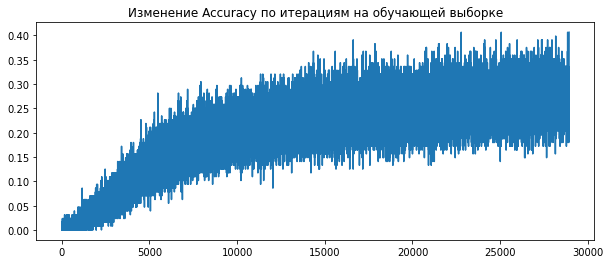

Result of validation:
Loss: 3.5328 Accuracy: 37.5%: 100%|██████████| 79/79 [00:05<00:00, 14.36it/s]
Epoch №: 38
Loss: 3.5447 Accuracy: 37.5%: 100%|██████████| 782/782 [01:08<00:00, 11.44it/s]


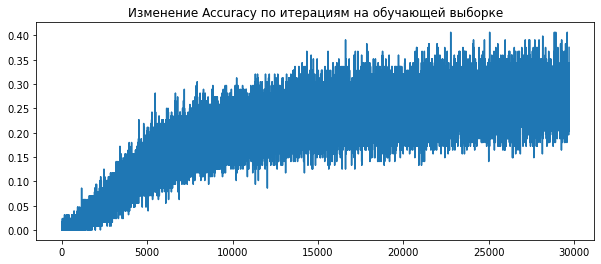

Result of validation:
Loss: 3.6054 Accuracy: 37.5%: 100%|██████████| 79/79 [00:05<00:00, 14.52it/s]
Epoch №: 39
Loss: 3.7471 Accuracy: 18.75%: 100%|██████████| 782/782 [01:08<00:00, 11.43it/s]


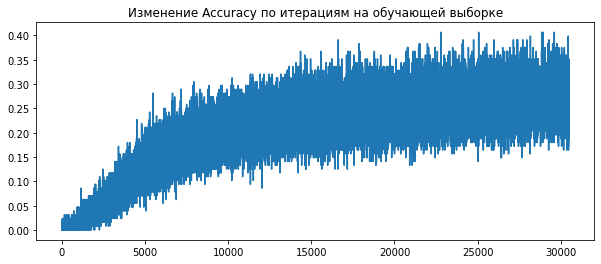

Result of validation:
Loss: 3.6125 Accuracy: 25.0%: 100%|██████████| 79/79 [00:05<00:00, 14.42it/s]
Epoch №: 40
Loss: 3.5174 Accuracy: 31.25%: 100%|██████████| 782/782 [01:08<00:00, 11.45it/s]


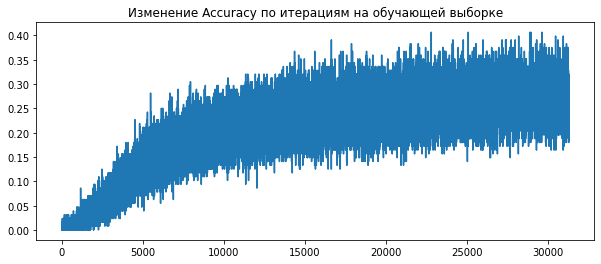

Result of validation:
Loss: 3.4728 Accuracy: 31.25%: 100%|██████████| 79/79 [00:05<00:00, 14.64it/s]
Epoch №: 41
Loss: 3.5298 Accuracy: 25.0%: 100%|██████████| 782/782 [01:08<00:00, 11.39it/s]


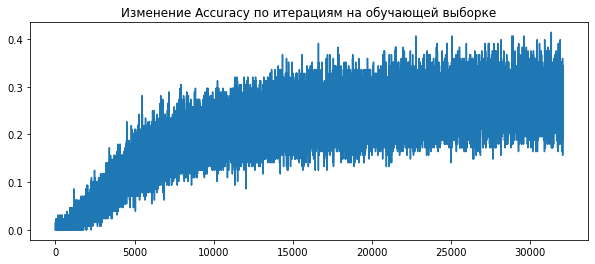

Result of validation:
Loss: 3.4966 Accuracy: 37.5%: 100%|██████████| 79/79 [00:05<00:00, 14.56it/s]
Epoch №: 42
Loss: 3.3926 Accuracy: 37.5%: 100%|██████████| 782/782 [01:08<00:00, 11.43it/s]


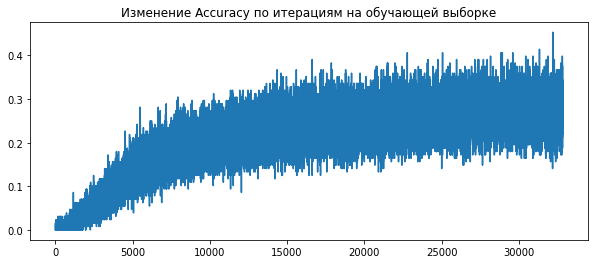

Result of validation:
Loss: 3.4111 Accuracy: 37.5%: 100%|██████████| 79/79 [00:05<00:00, 14.49it/s]
Epoch №: 43
Loss: 3.5415 Accuracy: 34.375%: 100%|██████████| 782/782 [01:08<00:00, 11.41it/s]


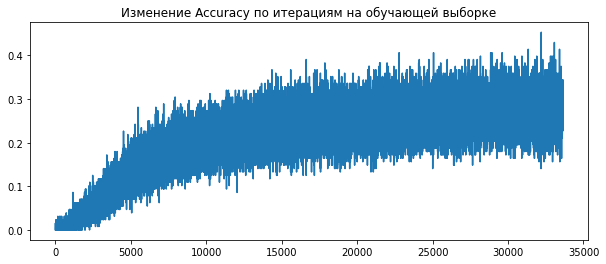

Result of validation:
Loss: 3.4365 Accuracy: 37.5%: 100%|██████████| 79/79 [00:05<00:00, 14.22it/s]
Epoch №: 44
Loss: 3.7328 Accuracy: 25.0%: 100%|██████████| 782/782 [01:08<00:00, 11.36it/s]


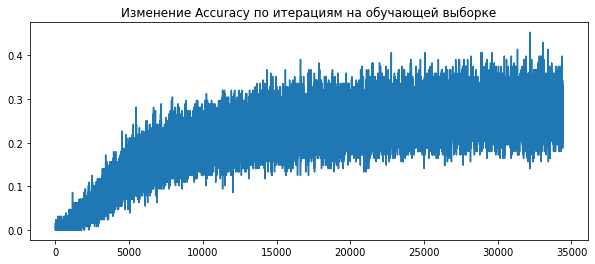

Result of validation:
Loss: 3.4331 Accuracy: 37.5%: 100%|██████████| 79/79 [00:05<00:00, 14.23it/s]
Epoch №: 45
Loss: 4.072 Accuracy: 21.875%: 100%|██████████| 782/782 [01:09<00:00, 11.33it/s]


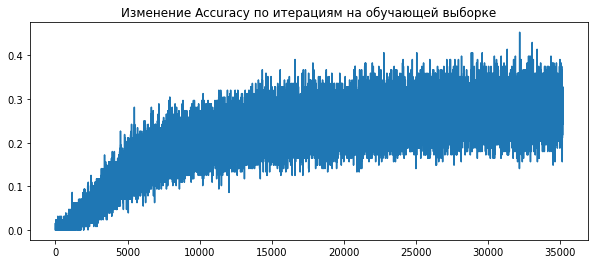

Result of validation:
Loss: 3.468 Accuracy: 37.5%: 100%|██████████| 79/79 [00:05<00:00, 14.39it/s]
Epoch №: 46
Loss: 3.1633 Accuracy: 37.5%: 100%|██████████| 782/782 [01:08<00:00, 11.38it/s]


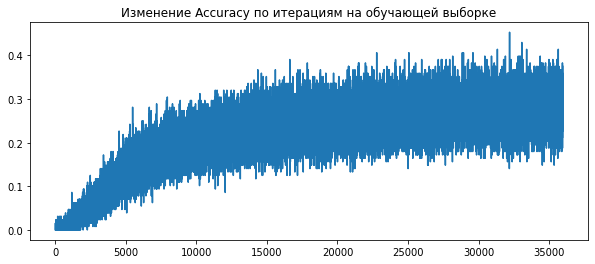

Result of validation:
Loss: 3.4122 Accuracy: 43.75%: 100%|██████████| 79/79 [00:05<00:00, 14.46it/s]
Epoch №: 47
Loss: 4.1746 Accuracy: 12.5%: 100%|██████████| 782/782 [01:08<00:00, 11.37it/s]


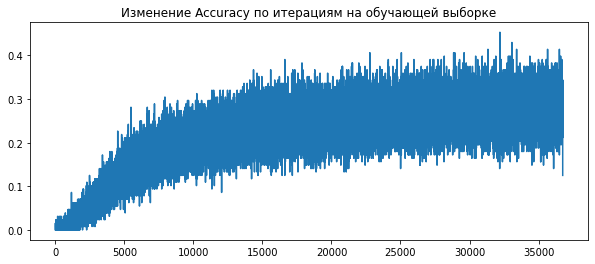

Result of validation:
Loss: 3.4702 Accuracy: 37.5%: 100%|██████████| 79/79 [00:05<00:00, 13.41it/s]
Epoch №: 48
Loss: 3.5287 Accuracy: 25.0%: 100%|██████████| 782/782 [01:08<00:00, 11.39it/s]


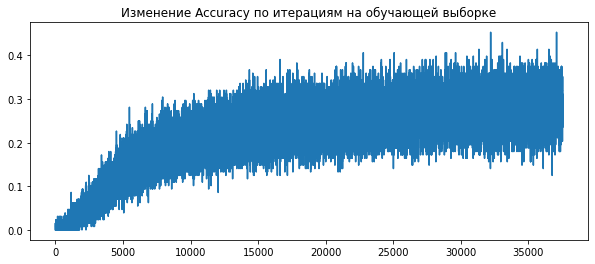

Result of validation:
Loss: 3.4174 Accuracy: 43.75%: 100%|██████████| 79/79 [00:05<00:00, 14.51it/s]
Epoch №: 49
Loss: 3.733 Accuracy: 25.0%: 100%|██████████| 782/782 [01:08<00:00, 11.35it/s]


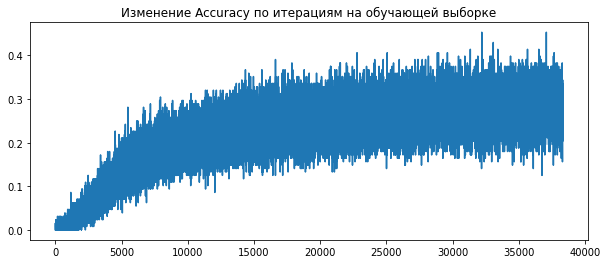

Result of validation:
Loss: 3.47 Accuracy: 37.5%: 100%|██████████| 79/79 [00:05<00:00, 14.38it/s]
Epoch №: 50
Loss: 3.5499 Accuracy: 34.375%: 100%|██████████| 782/782 [01:08<00:00, 11.38it/s]


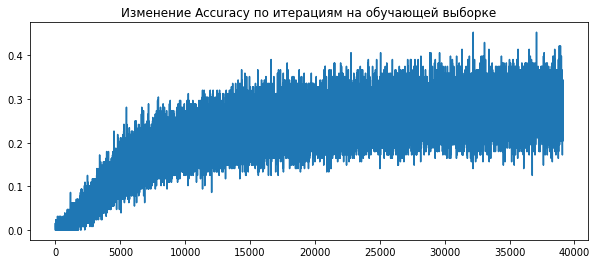

Result of validation:
Loss: 3.3525 Accuracy: 37.5%: 100%|██████████| 79/79 [00:05<00:00, 14.40it/s]


In [ ]:
train(model, train_dataloader, val_dataloader, criterion, optimizer, device, n_epochs, scheduler)

Запустим ещё на 20 эпох и дадим модели дообучиться:

In [ ]:
train(model, train_dataloader, val_dataloader, criterion, optimizer, device, n_epochs=20, scheduler=None)

После всех экспериментов которые вы проделали, выберите лучшую из своих моделей, запустите функцию evaluate. Эта функция должна брать на вход модель и даталоадер с валидационными данными и возврашать accuracy, посчитанную на этом датасете.

In [ ]:
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(true_labels, predicted_labels)
print("Оценка за это задание составит {} баллов".format(min(5, 5*accuracy / 0.44)))

Loss: 3.3525 Accuracy: 37.5%: 100%|██████████| 79/79 [00:05<00:00, 14.29it/s]
Оценка за это задание составит 3.129545454545454 баллов


In [ ]:
from torchvision.models import resnet152

# Загрузить предобученную сеть -- pretrained=True
model = resnet152(pretrained=True)

In [ ]:
model.fc = nn.Linear(2048, 200)

In [ ]:
model = model #resnet152
optimizer = torch.optim.Adam(model.fc.parameters(), lr = 0.00001)
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
val_dataloader = DataLoader(val_dataset, batch_size=64, num_workers=4)
criterion = nn.CrossEntropyLoss()
scheduler = None
n_epochs = 50
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

Epoch №: 1
Loss: 4.7672 Accuracy: 15.625%: 100%|██████████| 1563/1563 [04:54<00:00,  5.30it/s]


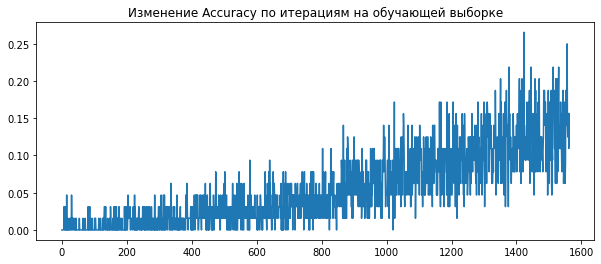

Result of validation:
Loss: 5.104 Accuracy: 6.25%: 100%|██████████| 157/157 [00:10<00:00, 15.56it/s]
Epoch №: 2
Loss: 4.4298 Accuracy: 25.0%: 100%|██████████| 1563/1563 [04:56<00:00,  5.26it/s]


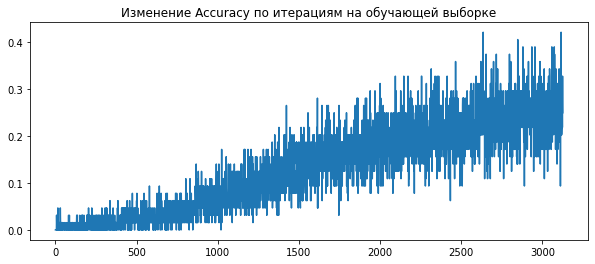

Result of validation:
Loss: 5.4236 Accuracy: 6.25%: 100%|██████████| 157/157 [00:10<00:00, 15.44it/s]
Epoch №: 3
Loss: 4.0093 Accuracy: 34.375%: 100%|██████████| 1563/1563 [04:57<00:00,  5.25it/s]


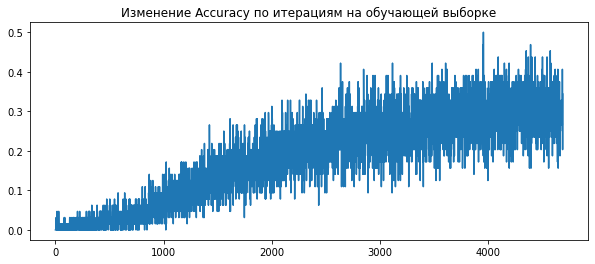

Result of validation:
Loss: 4.1743 Accuracy: 37.5%: 100%|██████████| 157/157 [00:10<00:00, 15.53it/s]
Epoch №: 4
Loss: 3.7798 Accuracy: 28.125%: 100%|██████████| 1563/1563 [04:56<00:00,  5.26it/s]


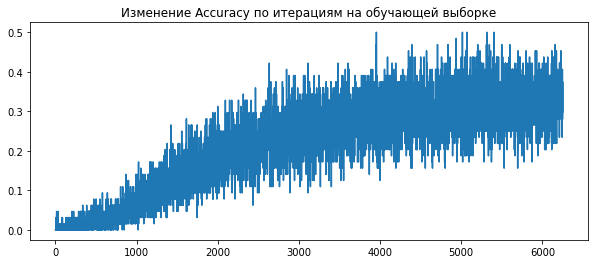

Result of validation:
Loss: 4.0365 Accuracy: 43.75%: 100%|██████████| 157/157 [00:10<00:00, 15.34it/s]
Epoch №: 5
Loss: 3.7607 Accuracy: 21.875%: 100%|██████████| 1563/1563 [04:59<00:00,  5.21it/s]


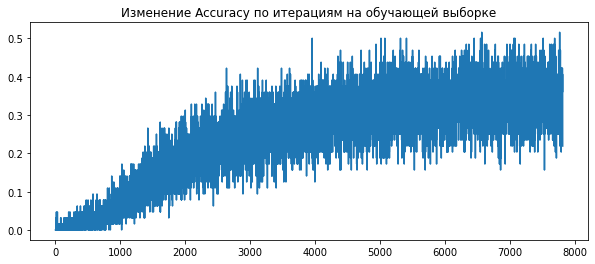

Result of validation:
Loss: 3.8343 Accuracy: 43.75%: 100%|██████████| 157/157 [00:10<00:00, 15.48it/s]
Epoch №: 6
Loss: 3.5468 Accuracy: 28.125%: 100%|██████████| 1563/1563 [04:56<00:00,  5.27it/s]


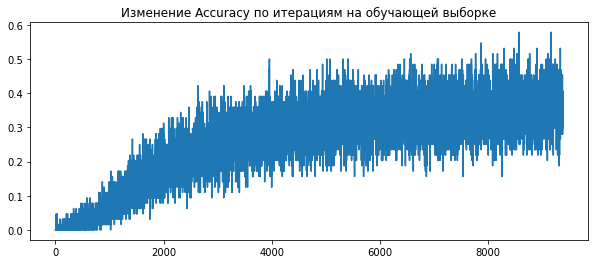

Result of validation:
Loss: 5.0086 Accuracy: 37.5%: 100%|██████████| 157/157 [00:10<00:00, 15.52it/s]
Epoch №: 7
Loss: 3.1084 Accuracy: 43.75%: 100%|██████████| 1563/1563 [04:55<00:00,  5.29it/s]


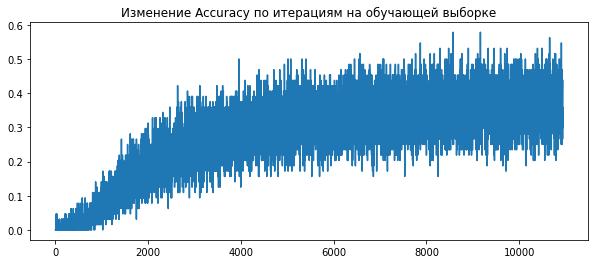

Result of validation:
Loss: 4.2207 Accuracy: 43.75%: 100%|██████████| 157/157 [00:10<00:00, 15.56it/s]
Epoch №: 8
Loss: 3.1869 Accuracy: 28.125%: 100%|██████████| 1563/1563 [04:54<00:00,  5.31it/s]


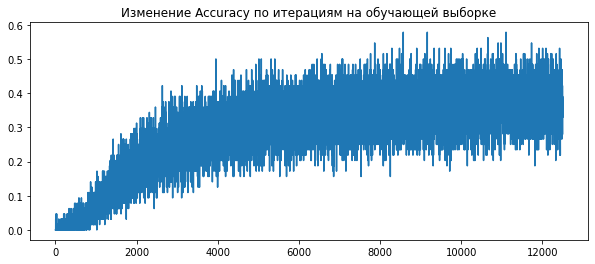

Result of validation:
Loss: 3.5294 Accuracy: 43.75%: 100%|██████████| 157/157 [00:10<00:00, 15.67it/s]
Epoch №: 9
Loss: 3.1768 Accuracy: 37.5%: 100%|██████████| 1563/1563 [04:53<00:00,  5.33it/s]


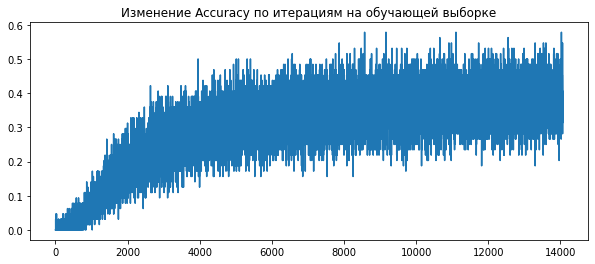

Result of validation:
Loss: 4.1961 Accuracy: 37.5%: 100%|██████████| 157/157 [00:10<00:00, 15.63it/s]
Epoch №: 10
Loss: 3.0396 Accuracy: 40.625%: 100%|██████████| 1563/1563 [04:52<00:00,  5.34it/s]


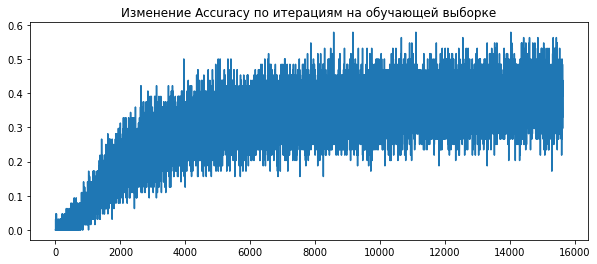

Result of validation:
Loss: 4.0006 Accuracy: 37.5%: 100%|██████████| 157/157 [00:10<00:00, 15.62it/s]
Epoch №: 11
Loss: 3.0267 Accuracy: 31.25%: 100%|██████████| 1563/1563 [04:52<00:00,  5.35it/s]


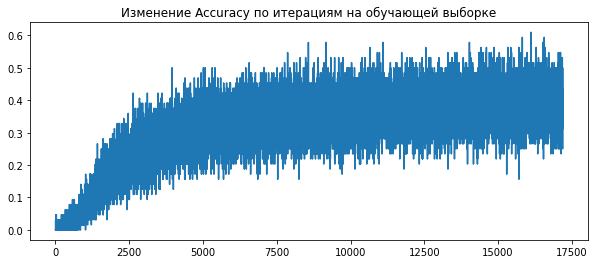

Result of validation:
Loss: 3.5231 Accuracy: 43.75%: 100%|██████████| 157/157 [00:10<00:00, 15.35it/s]
Epoch №: 12
Loss: 3.4368 Accuracy: 28.125%: 100%|██████████| 1563/1563 [04:51<00:00,  5.36it/s]


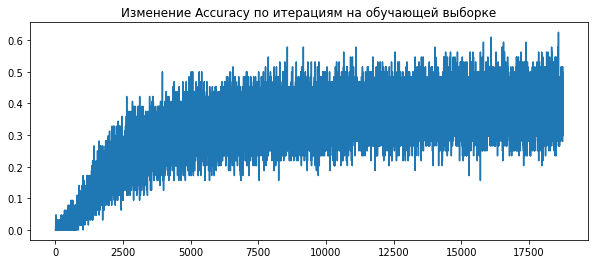

Result of validation:
Loss: 7.4082 Accuracy: 37.5%: 100%|██████████| 157/157 [00:09<00:00, 15.74it/s]
Epoch №: 13
Loss: 3.3157 Accuracy: 28.125%: 100%|██████████| 1563/1563 [04:51<00:00,  5.37it/s]


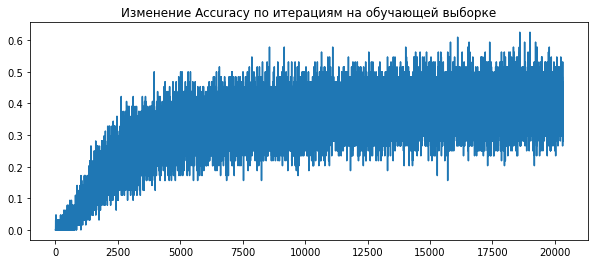

Result of validation:
Loss: 6.6658 Accuracy: 37.5%: 100%|██████████| 157/157 [00:09<00:00, 15.71it/s]
Epoch №: 14
Loss: 2.5652 Accuracy: 50.0%: 100%|██████████| 1563/1563 [04:51<00:00,  5.37it/s]


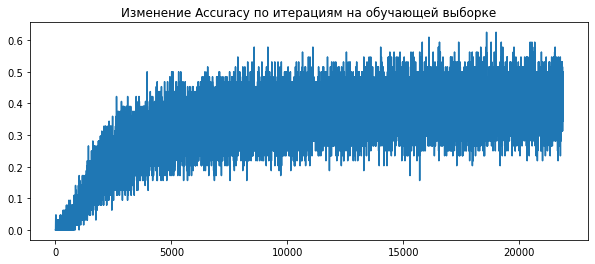

Result of validation:
Loss: 3.513 Accuracy: 50.0%: 100%|██████████| 157/157 [00:10<00:00, 15.69it/s]
Epoch №: 15
Loss: 2.7703 Accuracy: 31.25%: 100%|██████████| 1563/1563 [04:50<00:00,  5.37it/s]


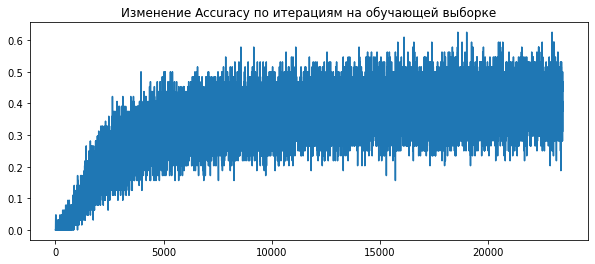

Result of validation:
Loss: 5.0506 Accuracy: 37.5%: 100%|██████████| 157/157 [00:09<00:00, 15.74it/s]
Epoch №: 16
Loss: 2.7533 Accuracy: 43.75%: 100%|██████████| 1563/1563 [04:49<00:00,  5.40it/s]


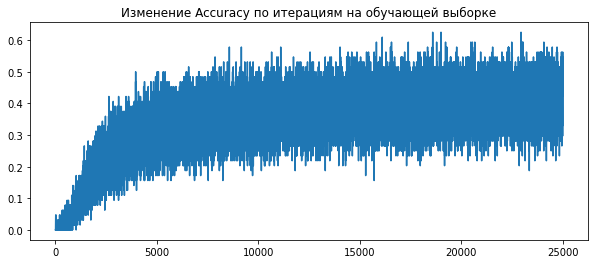

Result of validation:
Loss: 5.1183 Accuracy: 37.5%: 100%|██████████| 157/157 [00:10<00:00, 15.58it/s]
Epoch №: 17
Loss: 2.9023 Accuracy: 34.375%: 100%|██████████| 1563/1563 [04:49<00:00,  5.39it/s]


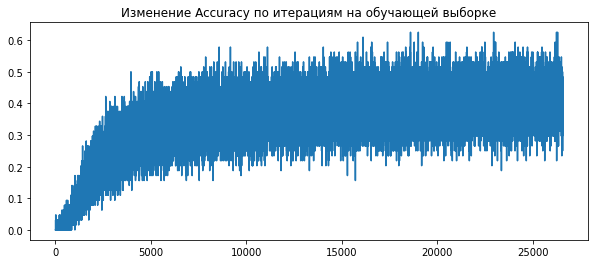

Result of validation:
Loss: 4.3479 Accuracy: 37.5%: 100%|██████████| 157/157 [00:09<00:00, 15.76it/s]
Epoch №: 18
Loss: 2.7901 Accuracy: 37.5%: 100%|██████████| 1563/1563 [04:49<00:00,  5.40it/s]


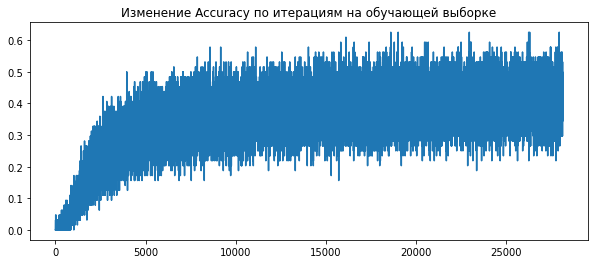

Result of validation:
Loss: 2.9491 Accuracy: 50.0%: 100%|██████████| 157/157 [00:10<00:00, 15.59it/s]
Epoch №: 19
Loss: 2.6847 Accuracy: 43.75%: 100%|██████████| 1563/1563 [04:49<00:00,  5.40it/s]


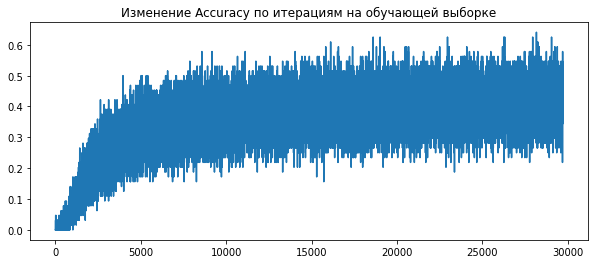

Result of validation:
Loss: 4.1766 Accuracy: 37.5%: 100%|██████████| 157/157 [00:09<00:00, 15.72it/s]
Epoch №: 20
Loss: 2.4965 Accuracy: 46.875%: 100%|██████████| 1563/1563 [05:01<00:00,  5.19it/s]


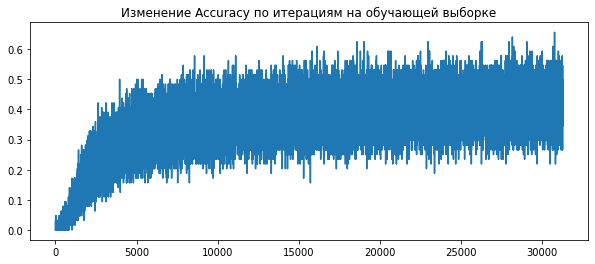

Result of validation:
Loss: 3.7605 Accuracy: 43.75%: 100%|██████████| 157/157 [00:10<00:00, 15.26it/s]
Epoch №: 21
Loss: 2.4931 Accuracy: 39.0625%:  78%|███████▊  | 1216/1563 [03:50<01:05,  5.27it/s]Buffered data was truncated after reaching the output size limit.

In [ ]:
train(model, train_dataloader, val_dataloader, criterion, optimizer, device, n_epochs, scheduler)

In [ ]:
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(true_labels, predicted_labels)
print("Оценка за это задание составит {} баллов".format(min(5, 5*accuracy / 0.44)))

Loss: 3.3639 Accuracy: 50.0%: 100%|██████████| 157/157 [00:10<00:00, 15.14it/s]
Оценка за это задание составит 4.694318181818182 баллов


__Ваш отчёт о проделанных экспериментах__: Сначала решил попробовать вместе с копипастом код из семинара 5 взять ту же модель, но она дала качество на уровне точности верных ответов в 20% после 10 эпох без каких-либо надежд на дальнешйее изучение. Взглянув на архитектуру GoogLeNet, решил попробовать использовать её ввиду достаточно сложности. Вообще, мотивация брать предобученные модели достаточно проста: задача классификации двухсот изображений, в классах которых находятся порой совсем странные классы (183 - то какие-то ворота, то свиньи, 182 - видимо, деревянные ложки), при обучении собственной модели вряд ли будет выполнена хорошо ввиду ограниченности собственной фантазии в построении модели, так почему бы не использовать предобученные архитектуры, которые уже показали на практике свою эффективность? Действительно, получается 3 балла даже без каких-либо аугментаций и невероятных сложностей.

Дальше я поставил на ночь обучаться усовершенствованную модель resnet, которая действительно дала требуемое качество после весьма продолжительного обучения.

В рамках работы над данным заданием я применял разные lr для оптимайзера, размеры батча (от 16 до 128), эвристически нашёл вот такое решение, которое дало приемлемый результат. Наверняка я чего-то не понимаю, но для меня использование предобученных моделей не стало панацеей, за 10 минут решившей задачу.

## Часть 2. Object detection.

В этом задании потребуется обучить детектор фруктов на изображении. Датасет можно скачать [отсюда](https://yadi.sk/d/UPwQB7OZrB48qQ).

In [1]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader

In [2]:
# we will need this library to process the labeling
! pip install xmltodict

In [3]:
import xmltodict, json

In [4]:
!unzip -q /content/drive/MyDrive/HW_2_IAD20/archive.zip

In [6]:
!ls

dataset  drive	sample_data  test_zip  train_zip


Датасет мы за вас написали.

In [49]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
import xmltodict
import json
import glob
import cv2
import os
import torchvision
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from tqdm import tqdm
# add any imports you need

class2tag = {"apple": 1, "orange": 2, "banana": 3}


class FruitDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.images = []
        self.annotations = []
        self.transform = transform
        for annotation in glob.glob(data_dir + "/*xml"):
            image_fname = os.path.splitext(annotation)[0] + ".jpg"
            self.images.append(cv2.cvtColor(cv2.imread(image_fname), cv2.COLOR_BGR2RGB))
            with open(annotation) as f:
                annotation_dict = xmltodict.parse(f.read())
            bboxes = []
            labels = []
            objects = annotation_dict["annotation"]["object"]
            if not isinstance(objects, list):
                objects = [objects]
            for obj in objects:
                bndbox = obj["bndbox"]
                bbox = [bndbox["xmin"], bndbox["ymin"], bndbox["xmax"], bndbox["ymax"]]
                bbox = list(map(int, bbox))
                bboxes.append(torch.tensor(bbox))
                labels.append(class2tag[obj["name"]])
            self.annotations.append(
                {"boxes": torch.stack(bboxes).float(), "labels": torch.tensor(labels)}
            )

    def __getitem__(self, i):
        if self.transform:
            # the following code is correct if you use albumentations
            # if you use torchvision transforms you have to modify it =)
            res = self.transform(
                image=self.images[i],
                bboxes=self.annotations[i]["boxes"],
                labels=self.annotations[i]["labels"],
            )
            return res["image"], {
                "boxes": torch.tensor(res["bboxes"]),
                "labels": torch.tensor(res["labels"]),
            }
        else:
            return self.images[i], self.annotations[i]

    def __len__(self):
        return len(self.images)

Выпишем кое-какую техническую работу, которая уже была на семинаре.

In [50]:
def intersection_over_union(dt_bbox, gt_bbox):
    """
    Intersection over Union between two bboxes
    :param dt_bbox: list or numpy array of size (4,) [x0, y0, x1, y1]
    :param gt_bbox: list or numpy array of size (4,) [x0, y0, x1, y1]
    :return : intersection over union
    """

    intersection_bbox = np.array(
        [
            max(dt_bbox[0], gt_bbox[0]),
            max(dt_bbox[1], gt_bbox[1]),
            min(dt_bbox[2], gt_bbox[2]),
            min(dt_bbox[3], gt_bbox[3]),
        ]
    )

    intersection_area = max(intersection_bbox[2] - intersection_bbox[0], 0) * max(
        intersection_bbox[3] - intersection_bbox[1], 0
    )
    area_dt = (dt_bbox[2] - dt_bbox[0]) * (dt_bbox[3] - dt_bbox[1])
    area_gt = (gt_bbox[2] - gt_bbox[0]) * (gt_bbox[3] - gt_bbox[1])

    union_area = area_dt + area_gt - intersection_area

    iou = intersection_area / union_area
    return iou

def evaluate_sample(target_pred, target_true, iou_threshold=0.5):
    gt_bboxes = target_true["boxes"].numpy()
    gt_labels = target_true["labels"].numpy()

    dt_bboxes = target_pred["boxes"].numpy()
    dt_labels = target_pred["labels"].numpy()
    dt_scores = target_pred["scores"].numpy()

    results = []
    for detection_id in range(len(dt_labels)):
        dt_bbox = dt_bboxes[detection_id, :]
        dt_label = dt_labels[detection_id]
        dt_score = dt_scores[detection_id]

        detection_result_dict = {"score": dt_score}

        max_IoU = 0
        max_gt_id = -1
        for gt_id in range(len(gt_labels)):
            gt_bbox = gt_bboxes[gt_id, :]
            gt_label = gt_labels[gt_id]

            if gt_label != dt_label:
                continue

            if intersection_over_union(dt_bbox, gt_bbox) > max_IoU:
                max_IoU = intersection_over_union(dt_bbox, gt_bbox)
                max_gt_id = gt_id

        if max_gt_id >= 0 and max_IoU >= iou_threshold:
            detection_result_dict["TP"] = 1
            gt_labels = np.delete(gt_labels, max_gt_id, axis=0)
            gt_bboxes = np.delete(gt_bboxes, max_gt_id, axis=0)

        else:
            detection_result_dict["TP"] = 0

        results.append(detection_result_dict)

    return results


def evaluate(model, test_loader, device):
    results = []
    model.eval()
    nbr_boxes = 0
    with torch.no_grad():
        for batch, (images, targets_true) in enumerate(test_loader):
            images = list(image.to(device).float() for image in images)
            targets_pred = model(images)
            targets_true = [
                {k: v.cpu().float() for k, v in t.items()} for t in targets_true
            ]
            targets_pred = [
                {k: v.cpu().float() for k, v in t.items()} for t in targets_pred
            ]

            for i in range(len(targets_true)):
                target_true = targets_true[i]
                target_pred = targets_pred[i]
                nbr_boxes += target_true["labels"].shape[0]

                results.extend(evaluate_sample(target_pred, target_true))

    results = sorted(results, key=lambda k: k["score"], reverse=True)

    acc_TP = np.zeros(len(results))
    acc_FP = np.zeros(len(results))
    recall = np.zeros(len(results))
    precision = np.zeros(len(results))

    if results[0]["TP"] == 1:
        acc_TP[0] = 1
    else:
        acc_FP[0] = 1

    for i in range(1, len(results)):
        acc_TP[i] = results[i]["TP"] + acc_TP[i - 1]
        acc_FP[i] = (1 - results[i]["TP"]) + acc_FP[i - 1]

        precision[i] = acc_TP[i] / (acc_TP[i] + acc_FP[i])
        recall[i] = acc_TP[i] / nbr_boxes

    return auc(recall, precision)

Вам мы оставляем творческую часть =)

__Задание__. Обучите модель для object detection на __обучающем__ датасете и добейтесь PR-AUC не менее __0.91__ на  __тестовом__.

 - Создайте модель и оптимайзер
 - Напишите функцию обучения модели
 - Используйте аугментации
 
Использовать аугментации для обучения __обязательно__. Они дадут 1 балл из 5. Пользуйтесь модулем torchvision.transforms или библиотекой albumentations (о которой говорилось ранее). Последняя библиотека особенно удобна, поскольку умеет сама вычислять новые координаты bounding box'ов после трансформаций картинки. Советуем обратить внимание на следующий [гайд](https://albumentations.ai/docs/getting_started/bounding_boxes_augmentation/). Обратите внимание, что код, написанный в датасете выше, верен только если вы используете albumentations. Если вы выбрали путь torchvision.transforms, вам потребуется метод `__getitem__` изменить (что-то типа `return self.transform(self.images[i])`; однако в таком случае вычислять новые координаты bounding box'ов после трансформаций вам придётся вручную =))

Оставшиеся 4 балла вычисляются по простой формуле: __min(4, 4 * Ваш auc / 0.91)__.

In [51]:
#!pip install --upgrade albumentations

In [52]:
def train_one_epoch(model, train_dataloader, optimizer, device):
    model.to(device).train()
    n = 0
    global_loss = 0
    with tqdm(total=len(train_dataloader), file=sys.stdout) as prbar:
      for images, targets in train_dataloader:
        images = list(image.to(device).float() for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        dict_loss = model(images, targets)
        losses = sum(loss for loss in dict_loss.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        n += 1
        global_loss += float(losses.cpu().detach().numpy())

        if n % 10 == 0:
            print("Loss value after {} batches is {}".format(n, round(global_loss / n, 2)))

    return global_loss


def train(model, train_dataloader, val_dataloader, optimizer, device, n_epochs=10):
    for epoch in range(n_epochs):
        model.to(device).eval()
        a = evaluate(model, val_dataloader, device=device)
        print("AUC ON TEST: {:.3f}".format(a))
        model.train()
        train_one_epoch(model, train_dataloader, optimizer, device=device)

In [53]:
import albumentations as A
import cv2
import albumentations.pytorch.transforms as tr


train_transform = A.Compose([A.ChannelDropout(p=0.25),
                             A.HorizontalFlip(p=0.25),
                             A.RandomBrightnessContrast(p=0.125),
                             A.ToGray(p=0.125),
                             tr.ToTensor()], bbox_params=A.BboxParams(format='pascal_voc', label_fields=[]))
val_transform = A.Compose([tr.ToTensor()], bbox_params=A.BboxParams(format='pascal_voc', label_fields=[]))
# HINT: TRAIN TRANSFORM OBVIOUSLY SHOULD BE HARDER THAN THOSE FOR VALIDATION

train_dataset = FruitDataset("./train_zip/train", transform=train_transform)
val_dataset = FruitDataset("./test_zip/test", transform=val_transform)

from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import fasterrcnn_resnet50_fpn

def get_detection_model(num_classes=4):
    model = fasterrcnn_resnet50_fpn(pretrained=True)
    # get the number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    return model

model = get_detection_model()

optimizer = torch.optim.Adam(model.parameters(), lr=0.00005)

def collate_fn(batch):
    return tuple(zip(*batch))
train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True, num_workers=4, collate_fn=collate_fn,)
val_dataloader = DataLoader(val_dataset, batch_size=2, num_workers=4, collate_fn=collate_fn,)
n_epochs = 5
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

In [56]:
train(model, train_dataloader, val_dataloader, optimizer, device, n_epochs=25)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(Tru

AUC ON TEST: 0.882
  0%|          | 0/120 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(Tru

Loss value after 10 batches is 0.1
Loss value after 20 batches is 0.11
Loss value after 30 batches is 0.1
Loss value after 40 batches is 0.1
Loss value after 50 batches is 0.1
Loss value after 60 batches is 0.11
Loss value after 70 batches is 0.11
Loss value after 80 batches is 0.11
Loss value after 90 batches is 0.11
Loss value after 100 batches is 0.11
Loss value after 110 batches is 0.1
Loss value after 120 batches is 0.11
  0%|          | 0/120 [01:09<?, ?it/s]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(Tru

AUC ON TEST: 0.899
  0%|          | 0/120 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(Tru

Loss value after 10 batches is 0.13
Loss value after 20 batches is 0.11
Loss value after 30 batches is 0.12
Loss value after 40 batches is 0.11
Loss value after 50 batches is 0.1
Loss value after 60 batches is 0.1
Loss value after 70 batches is 0.1
Loss value after 80 batches is 0.1
Loss value after 90 batches is 0.11
Loss value after 100 batches is 0.11
Loss value after 110 batches is 0.11
Loss value after 120 batches is 0.11
  0%|          | 0/120 [01:09<?, ?it/s]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(Tru

AUC ON TEST: 0.879
  0%|          | 0/120 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(Tru

Loss value after 10 batches is 0.08
Loss value after 20 batches is 0.1
Loss value after 30 batches is 0.1
Loss value after 40 batches is 0.09
Loss value after 50 batches is 0.1
Loss value after 60 batches is 0.1
Loss value after 70 batches is 0.1
Loss value after 80 batches is 0.11
Loss value after 90 batches is 0.11
Loss value after 100 batches is 0.11
Loss value after 110 batches is 0.11
Loss value after 120 batches is 0.11
  0%|          | 0/120 [01:09<?, ?it/s]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(Tru

AUC ON TEST: 0.913
  0%|          | 0/120 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(Tru

Loss value after 10 batches is 0.12
Loss value after 20 batches is 0.1
Loss value after 30 batches is 0.1
Loss value after 40 batches is 0.1
Loss value after 50 batches is 0.1
Loss value after 60 batches is 0.1
Loss value after 70 batches is 0.1
Loss value after 80 batches is 0.1
Loss value after 90 batches is 0.1
Loss value after 100 batches is 0.1
Loss value after 110 batches is 0.1
Loss value after 120 batches is 0.1
  0%|          | 0/120 [01:11<?, ?it/s]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(Tru

AUC ON TEST: 0.906
  0%|          | 0/120 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(Tru

Loss value after 10 batches is 0.11
Loss value after 20 batches is 0.1
Loss value after 30 batches is 0.1
Loss value after 40 batches is 0.1
Loss value after 50 batches is 0.1
Loss value after 60 batches is 0.09
Loss value after 70 batches is 0.09
Loss value after 80 batches is 0.09
Loss value after 90 batches is 0.09
Loss value after 100 batches is 0.09
Loss value after 110 batches is 0.09
Loss value after 120 batches is 0.09
  0%|          | 0/120 [01:10<?, ?it/s]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(Tru

AUC ON TEST: 0.912
  0%|          | 0/120 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(Tru

Loss value after 10 batches is 0.08
Loss value after 20 batches is 0.07
Loss value after 30 batches is 0.08
Loss value after 40 batches is 0.08
Loss value after 50 batches is 0.07
Loss value after 60 batches is 0.08
Loss value after 70 batches is 0.08
Loss value after 80 batches is 0.08
Loss value after 90 batches is 0.09
Loss value after 100 batches is 0.09
Loss value after 110 batches is 0.09
Loss value after 120 batches is 0.09
  0%|          | 0/120 [01:10<?, ?it/s]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(Tru

AUC ON TEST: 0.894
  0%|          | 0/120 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(Tru

Loss value after 10 batches is 0.12
Loss value after 20 batches is 0.11
  0%|          | 0/120 [00:17<?, ?it/s]


KeyboardInterrupt: ignored

__Выведите итоговое качество модели__.

In [57]:
auc_value = evaluate(model, val_dataloader, device=device)
print("Оценка за это задание составит {} баллов".format(min(4, 4 * auc_value / 0.91)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(Tru

Оценка за это задание составит 3.878884498871483 баллов


Нарисуйте предсказанные bounding box'ы для любых двух картинок из __тестового__ датасета.

In [58]:
image, labels = next(iter(train_dataset))
pred = model(image.unsqueeze(0).to(device))[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


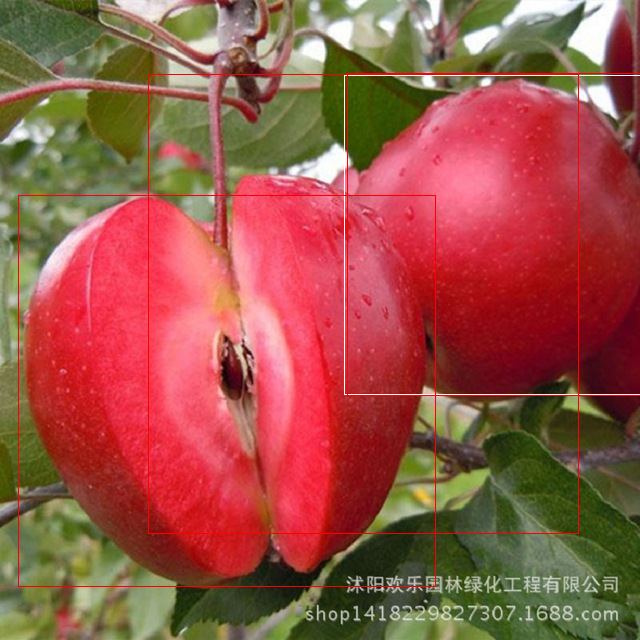

In [63]:
from PIL import ImageDraw

image = torchvision.transforms.ToPILImage()(image)
draw = ImageDraw.Draw(image)
for box in labels['boxes']:
    draw.rectangle([(box[0], box[1]), (box[2], box[3])])
    
for box in pred['boxes']:
    draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline='red')
image

## Бонус (10 баллов).

__Задание__. В части с классификацией добейтесь accuracy не менее 0.52. Напишите отчёт о проделанных экспериментах.

__Критерии оценки__. Оценка за бонусную часть равна 10, если вы преодолели качество 0.52 и 0 в противном случае.

__Иных оценок кроме 0 и 10 не предусмотрено__.

In [ ]:
# YOUR CODE

## Бонус (0 баллов).

__Задание 1__. Скиньте ниже смешную картинку, желательно про машинное обучение. На картинке не должно быть никаких упоминаний лектора, семинаристов и ассистентов этого курса. Вместо мема скидываю вам слайд про штуку, которую хотелось бы изучить в следующем полугодии и решить домашку на неё. Только, пожалуйста, давайте не создание игр, а что-то более прикладное именно к анализу данных :)
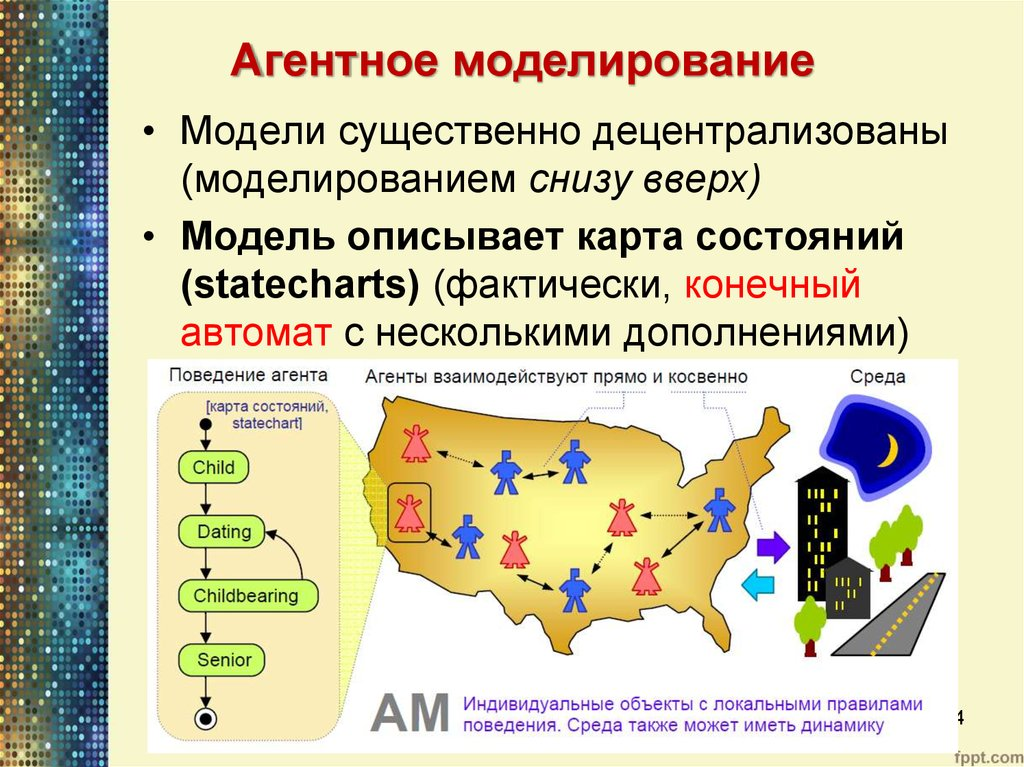

__Задание 2__. Расскажите, как вам задание? Что понравилось, что не понравилось, что можно улучшить? Мы примем во внимание любой фидбек. 

С каждой неделей этого полугодия меня всё больше и больше тошнит от Глубинного обучения. Учитывая то, что предыдущее полугодие вдохновило меня развиваться в области Data Science, думаю, что причиной этого можно назвать несколько узкую специализированность предмета изучения (мы два месяца занимались картинками, которые, как мне кажется, вряд ли много кто из студентов с ИАД будет часто обрабатывать, поэтому не совсем понятно, зачем мы почти всю содержательную часть курса потратили именно на это, а не на тексты с марковскими свойствами). 

Кейс с отменой бонусов хоть меня и не затронул ни коим образом (см. мои баллы за задачу 1), но жутко разочаровал с точки зрения организации курса: такая несобранность и непоследовательность в действиях преподавателей, которые сначала проявляют свою справедливую жёсткость в изменении критериев для бонуса, а затем идут на поводу у студентов и переносят не связанный с бонусом дедлайн, прияём делая это всё в самый последний вечер перед изначальным дедлайном - на мой взгляд случай не самый выгодный для репутации преподавателей. 

Что же касается непосредственно домашнего задания, то оно мне понравилось больше предыдущего, эдакий сугубо инженерный подход - добейся цели, которая будет показывать устойчивые результаты на наших данных, используя любые методы, которые можешь придумать. Очень хорошие подсказочки и заранее прописанные коды, которые и оставляют место для подумать, и дают возможность не мучиться чересчур долго. В любом случае, спасибо за попытку организовать всё максимально достойно и справедливо, я ценю ваши старания!!! Надеюсь, и вы оцените мои подглядывания семинаров, которые я мучительно пытался заставить работать для этих двух задачек...

P.s. Я думал, что трата 30-40 часов чистого времени на решение домашек прошлого полугодия - это много. Как же я ошибался, оказывается... 